In [34]:

import pandas as pd
import numpy as np

kepler_dataset = pd.read_csv("Kepler_exoplanet.csv")
# num_columns = len(kepler_dataset.columns)
# pd.set_option("display.max_columns", num_columns)

K2_dataset = pd.read_csv("K2_exoplanet.csv")

# num_columns = len(K2_dataset.columns)
# pd.set_option("display.max_columns", num_columns)

# replacing all the Confirmed values with candidate as they mean the same thing.
K2_dataset["k2c_disp"].replace({"CONFIRMED": "CANDIDATE"}, inplace=True)

#Selecting all the common columns in both the dataset
kepler_selected = kepler_dataset.iloc[:,[2,3,6,9,12,15,18,21,24,27,30,33]]
K2_selected = K2_dataset.iloc[:,[0,1,5,9,13,17,21,25,29,33,37,41]]

kepler_selected = kepler_selected.rename(columns={'koi_pdisposition': 'exoplanet_candidate', 
                                                  'koi_period': 'orbital_period',
                                                 'koi_impact': 'impact_parameter',
                                                 'koi_duration': 'transit_duration',
                                                 'koi_ror': 'candidate_star_radius_ratio',
                                                 'koi_prad':'candidate_radius',
                                                 'koi_teq': 'equilibrium_temp',
                                                 'koi_steff': 'effective_temprature',
                                                 'koi_slogg': 'surface_gravity',
                                                 'koi_smet':'stellar_metallicity',
                                                 'koi_srad':'stellar_radius',
                                                 'koi_kepmag':'kepler_band'})

K2_selected = K2_selected.rename(columns={'k2c_disp': 'exoplanet_candidate', 
                                                  'pl_orbper': 'orbital_period',
                                                 'pl_imppar': 'impact_parameter',
                                                 'pl_trandur': 'transit_duration',
                                                 'pl_ratror': 'candidate_star_radius_ratio',
                                                 'pl_rade':'candidate_radius',
                                                 'pl_eqt': 'equilibrium_temp',
                                                 'st_teff': 'effective_temprature',
                                                 'st_logg': 'surface_gravity',
                                                 'st_metfe':'stellar_metallicity',
                                                 'st_rad':'stellar_radius',
                                                 'st_kep':'kepler_band'})

# #multiplying by 24 because duration is in days not in hours
K2_selected['transit_duration'] = K2_selected['transit_duration'] * 24


In [35]:
#merging both the datasets with common columns
temp = [kepler_selected, K2_selected]
merged_df = pd.concat(temp)
merged_df

,exoplanet_candidate,orbital_period,impact_parameter,transit_duration,candidate_star_radius_ratio,candidate_radius,equilibrium_temp,effective_temprature,surface_gravity,stellar_metallicity,stellar_radius,kepler_band
0,CANDIDATE,9.488036,0.146,2.95750,0.022344,2.26,793.0,5455.0,4.467,0.14,0.927,15.347
1,CANDIDATE,54.418383,0.586,4.50700,0.027954,2.83,443.0,5455.0,4.467,0.14,0.927,15.347
2,CANDIDATE,19.899140,0.969,1.78220,0.154046,14.60,638.0,5853.0,4.544,-0.18,0.868,15.436
3,FALSE POSITIVE,1.736952,1.276,2.40641,0.387394,33.46,1395.0,5805.0,4.564,-0.52,0.791,15.597
4,CANDIDATE,2.525592,0.701,1.65450,0.024064,2.75,1406.0,6031.0,4.438,0.07,1.046,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...
2577,FALSE POSITIVE,26.286249,NaN,8.70240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.763
2578,FALSE POSITIVE,0.660085,NaN,1.96080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.029
2579,FALSE POSITIVE,3.374330,NaN,6.12000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.179
2580,FALSE POSITIVE,9.485826,NaN,15.34080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


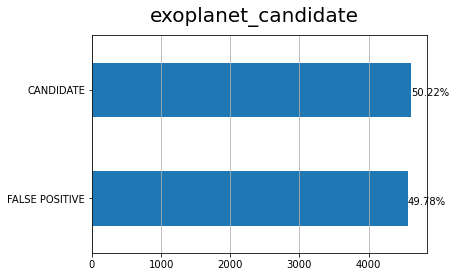

In [38]:
## plotting the balance of the class values or 'target variable'
import matplotlib.pyplot as plt
import seaborn as sns


y = "exoplanet_candidate"
ax = merged_df[y].value_counts().sort_values().plot(kind="barh")
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
ax.grid(axis="x")
plt.suptitle(y, fontsize=20)
plt.show()

In [45]:
#checking and removing the null values
merged_df.isnull().sum()
merged_df = merged_df.dropna()
merged_df.isnull().sum()

exoplanet_candidate            0
orbital_period                 0
impact_parameter               0
transit_duration               0
candidate_star_radius_ratio    0
candidate_radius               0
equilibrium_temp               0
effective_temprature           0
surface_gravity                0
stellar_metallicity            0
stellar_radius                 0
kepler_band                    0
dtype: int64

In [39]:
#splitting the datase in features and label
X = merged_df.drop('exoplanet_candidate', 1)
y = merged_df['exoplanet_candidate']

In [40]:
#one hot encoding the label
y = pd.get_dummies(y)            
y = y.drop('FALSE POSITIVE', 1)
y

,CANDIDATE
0,1
1,1
2,1
3,0
4,1
...,...
9559,0
9560,1
9561,0
9562,1


Feature 0: 0.654136
Feature 1: 34.947452
Feature 2: 212.218709
Feature 3: 23.169639
Feature 4: 3.607986
Feature 5: 951.212078
Feature 6: 333.834551
Feature 7: 185.922096
Feature 8: 688.208682
Feature 9: 47.736132
Feature 10: 25.710299


D:\DA_group_B\softwares\anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


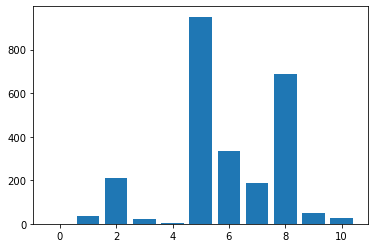

In [41]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot

#Feature selection ANOVA test 

# configure to select all features
fs = SelectKBest(score_func=f_classif, k='all')
# learn relationship from training data
fs.fit(X,y)

# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [42]:
#dropping least important feature accorfing to the ANOVA feature selection score
X = X.drop('orbital_period', axis = 1)
X

,impact_parameter,transit_duration,candidate_star_radius_ratio,candidate_radius,equilibrium_temp,effective_temprature,surface_gravity,stellar_metallicity,stellar_radius,kepler_band
0,0.146,2.95750,0.022344,2.26,793.0,5455.0,4.467,0.14,0.927,15.347
1,0.586,4.50700,0.027954,2.83,443.0,5455.0,4.467,0.14,0.927,15.347
2,0.969,1.78220,0.154046,14.60,638.0,5853.0,4.544,-0.18,0.868,15.436
3,1.276,2.40641,0.387394,33.46,1395.0,5805.0,4.564,-0.52,0.791,15.597
4,0.701,1.65450,0.024064,2.75,1406.0,6031.0,4.438,0.07,1.046,15.509
...,...,...,...,...,...,...,...,...,...,...
9559,1.252,3.22210,0.297633,29.35,2088.0,5638.0,4.529,0.14,0.903,14.082
9560,0.043,3.11400,0.006379,0.72,1608.0,6119.0,4.444,-0.04,1.031,14.757
9561,0.147,0.86500,0.009444,1.07,2218.0,6173.0,4.447,-0.04,1.041,15.385
9562,0.214,3.19900,0.022590,19.30,557.0,4989.0,2.992,0.07,7.824,10.998


In [43]:
import pandas as pd
from sklearn import preprocessing

#Scaling all the features on the same  scale

x = X.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X=pd.DataFrame(x_scaled, columns=X.columns)
X

,impact_parameter,transit_duration,candidate_star_radius_ratio,candidate_radius,equilibrium_temp,effective_temprature,surface_gravity,stellar_metallicity,stellar_radius,kepler_band
0,0.001448,0.020980,0.000211,0.000011,0.052452,0.211107,0.831296,0.862745,0.003560,0.642863
1,0.005813,0.032169,0.000267,0.000014,0.028548,0.211107,0.831296,0.862745,0.003560,0.642863
2,0.009613,0.012494,0.001530,0.000072,0.041866,0.241179,0.845778,0.758170,0.003303,0.649689
3,0.012658,0.017001,0.003866,0.000167,0.093566,0.237552,0.849539,0.647059,0.002968,0.662039
4,0.006954,0.011571,0.000228,0.000013,0.094318,0.254628,0.825842,0.839869,0.004077,0.655289
...,...,...,...,...,...,...,...,...,...,...
9172,0.012420,0.022891,0.002967,0.000146,0.140896,0.224934,0.842957,0.862745,0.003455,0.545831
9173,0.000427,0.022110,0.000051,0.000003,0.108114,0.261277,0.826970,0.803922,0.004012,0.597607
9174,0.001458,0.005871,0.000082,0.000005,0.149775,0.265357,0.827534,0.803922,0.004056,0.645777
9175,0.002123,0.022724,0.000213,0.000096,0.036334,0.175897,0.553884,0.839869,0.033573,0.309274


In [44]:
import numpy as np
from sklearn.model_selection import train_test_split

#Train-Test Splitting the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
y_train

,CANDIDATE
1171,1
7512,0
7698,0
6560,0
8086,0
...,...
5821,0
5259,1
5461,0
871,1


[0.73927842 0.72411444 0.73160763 0.74591281 0.73160763]
[0.7447243  0.73569482 0.74182561 0.7513624  0.74318801]
[0.75221239 0.73773842 0.74523161 0.75340599 0.74659401]
[0.75697754 0.74386921 0.7472752  0.75817439 0.7506812 ]
[0.75765827 0.7472752  0.7520436  0.76158038 0.7527248 ]
[0.75970048 0.7486376  0.75544959 0.76226158 0.75681199]
[0.76310415 0.7520436  0.75953678 0.76226158 0.75953678]
[0.76582709 0.7527248  0.76021798 0.76294278 0.76089918]
[0.76855003 0.75681199 0.76158038 0.76634877 0.76089918]
[0.77195371 0.75681199 0.76226158 0.76839237 0.76294278]
[0.77263445 0.75953678 0.76226158 0.77111717 0.76294278]
[0.77331518 0.76089918 0.76089918 0.77043597 0.76226158]
[0.77331518 0.76158038 0.76362398 0.77247956 0.76362398]
[0.77195371 0.76089918 0.76566757 0.77316076 0.76430518]
[0.77263445 0.76158038 0.76771117 0.77520436 0.76430518]
[0.77331518 0.76158038 0.76566757 0.77588556 0.76771117]
[0.77467665 0.76226158 0.76566757 0.77724796 0.76771117]
[0.77671886 0.76089918 0.768392

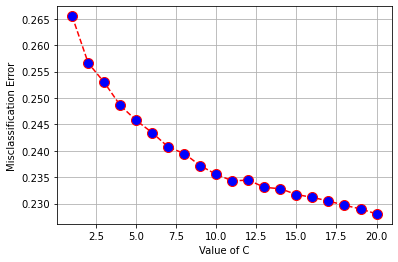

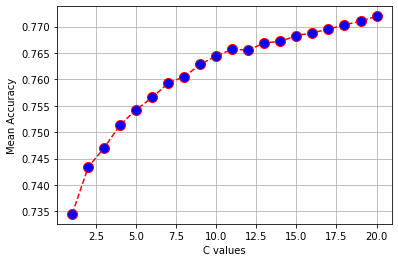

In [16]:
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import statistics as st
from matplotlib import pyplot as plt

#Using K-fold Cross validation to find optimal hyper-paamets for SVM model and fitting the model accorfing to those optimal
#values

C_values = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
mnl = []
cv_scores = []

for i in C_values:
    svm_clf = svm.SVC(kernel='rbf', C=i, random_state=7)
    scores = cross_val_score(svm_clf, X_train, np.ravel(y_train,order='C'), cv=5)
    print(scores)
    cv_scores.append(scores.mean())
    mn = st.mean(scores)
    mnl.append(mn)
    std = st.stdev(scores)
print('The mean of the Accuracies after K-fold is',mn)
print('The standard deviation after K-fold is',std)

MSE = [1-x for x in cv_scores]
#optimal K
optimal_C_index = MSE.index(min(MSE))
optimal_C = C_values[optimal_C_index]
print('The Optimal C value according to least Misclassification error is',optimal_C)
# plot misclassification error vs k
plt.plot(C_values, MSE,color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.xlabel('Value of C')
plt.ylabel('Misclassification Error')
plt.grid()
plt.show()

plt.plot(C_values, mnl,color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.xlabel('C values')
plt.ylabel('Mean Accuracy')
plt.grid()
plt.show()

In [18]:
#training the model according to optimal hyper parameters
svm_clf = svm.SVC(kernel='rbf', C=20, random_state=7).fit(X_train, np.ravel(y_train,order='C'))

In [19]:
print(scores.mean(), scores.std())

0.7719649319357549 0.006033993710313756


In [20]:
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report

#Predictin(testing) the trained SVM model
svm_pred = svm_clf.predict(X_test)

svm_pred

array([1, 1, 1, ..., 0, 1, 0], dtype=uint8)

              precision    recall  f1-score   support

           0       0.84      0.72      0.77       944
           1       0.74      0.86      0.79       892

    accuracy                           0.78      1836
   macro avg       0.79      0.79      0.78      1836
weighted avg       0.79      0.78      0.78      1836



<AxesSubplot:>

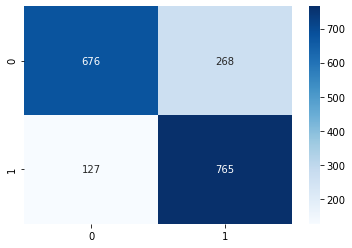

In [22]:
import seaborn as sns

#plotting and generating Classification report and confusion matrix for model evaluation.
cf_matrix_svm = confusion_matrix(y_test, svm_pred)

print(classification_report(y_test, svm_pred))

sns.heatmap(cf_matrix_svm, annot = True, cmap='Blues', fmt='g')

[0.71613342 0.70640327 0.72343324 0.70844687 0.71049046]
[0.70524166 0.70231608 0.70980926 0.70163488 0.71662125]
[0.73587474 0.70844687 0.72956403 0.71594005 0.72070845]
[0.72770592 0.72343324 0.72547684 0.70367847 0.72956403]
[0.73995916 0.70708447 0.72683924 0.72615804 0.72888283]
[0.73451327 0.70980926 0.72343324 0.72207084 0.72343324]
[0.73587474 0.71525886 0.71730245 0.72683924 0.72002725]
[0.7331518  0.71253406 0.72752044 0.73773842 0.72207084]
[0.73587474 0.71798365 0.72343324 0.73569482 0.71866485]
[0.74132063 0.71457766 0.72888283 0.73365123 0.72752044]
[0.73927842 0.72207084 0.73092643 0.72752044 0.72752044]
[0.73383254 0.72479564 0.72956403 0.73569482 0.71594005]
[0.7447243  0.72138965 0.72683924 0.73569482 0.72343324]
[0.74336283 0.72207084 0.73365123 0.74182561 0.72615804]
[0.74404357 0.71730245 0.73297003 0.73637602 0.72820163]
[0.73723622 0.71117166 0.73160763 0.74182561 0.73637602]
[0.73859769 0.71117166 0.72888283 0.74455041 0.73092643]
[0.73995916 0.70708447 0.730926

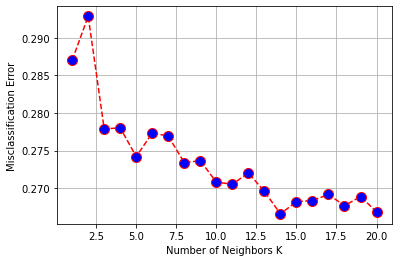

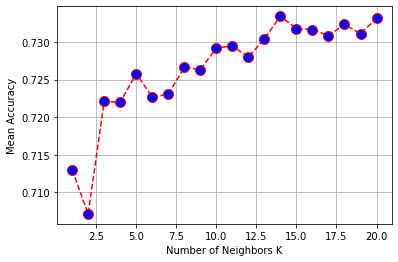

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

#Using  K-fold CV to find optimal K-value.

#hyper parameter tuning.Selecting best K
neighbors = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
# empty list that will hold cv scores
cv_scores = []
mnl = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, np.ravel(y_train,order='C'), cv=5, scoring='accuracy')
    print(scores)
    cv_scores.append(scores.mean())
    mn = st.mean(scores)
    mnl.append(mn)
    std = st.stdev(scores)
print('The mean of the Accuracies after K-fold is',mn)
print('The standard deviation after K-fold is',std)

#graphical view
#misclassification error
MSE = [1-x for x in cv_scores]
#optimal K
optimal_k_index = MSE.index(min(MSE))
optimal_k = neighbors[optimal_k_index]
print('The optimal K value according to least misclassification error is',optimal_k)
# plot misclassification error vs k
plt.plot(neighbors, MSE,color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10 )
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.grid()
plt.show()

plt.plot(neighbors, mnl, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Mean Accuracy')
plt.grid()
plt.show()

In [25]:
#training and testing the KNN on optimal K value

knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train,np.ravel(y_train,order='C'))
y_pred = knn.predict(X_test)

In [27]:
# Libraries and modules for model evaluation
from sklearn.metrics import confusion_matrix, classification_report
#generating confusion matrix and classification report.

cf_matrix = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.71      0.74       944
           1       0.72      0.79      0.75       892

    accuracy                           0.75      1836
   macro avg       0.75      0.75      0.75      1836
weighted avg       0.75      0.75      0.75      1836



<AxesSubplot:>

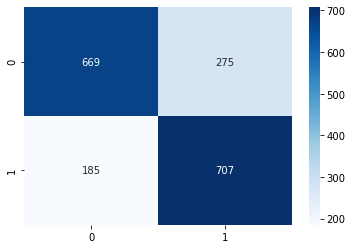

In [28]:
#plotting confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, cmap='Blues', fmt='g')

<AxesSubplot:>

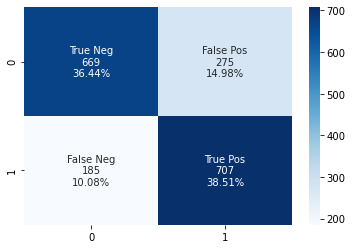

In [29]:
#just a experimental version of confusion matrix
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')